In [1]:
%pip install matplotlib tqdm

import matplotlib.pyplot as plt
import preprocess as pp
import neuralnetwork as nn
from train import train_network

            .-:/++oooo++/:-.
        `:/oooooooooooooooooo/-`
      -/oooooooooooooooooooo+ooo/-
    .+oooooooooooooooooo+/-`.ooooo+.
   :oooooooooooo+//:://++:. .ooooooo:
  /oooooooooo+o:`.----.``./+/oooooooo/
 /ooooooooo+. +ooooooooo+:``/ooooooooo/
.ooooooooo: .+ooooooooooooo- -ooooooooo.
/oooooo/o+ .ooooooo:`+oo+ooo- :oooooooo/
ooo+:. .o: :ooooo:` .+/. ./o+:/ooooooooo
oooo/-`.o: :ooo/` `/+.     ./.:ooooooooo
/oooooo+o+``++. `:+-          /oooooooo/
.ooooooooo/``  -+:`          :ooooooooo.
 /ooooooooo+--+/`          .+ooooooooo/
  /ooooooooooo+.`      `.:++:oooooooo/
   :oooooooooooooo++++oo+-` .ooooooo:
    .+ooooooooooooooooooo+:..ooooo+.
      -/oooooooooooooooooooooooo/-
        `-/oooooooooooooooooo/:`
            .-:/++oooo++/:-.
agherasie@agherasie-Predator-PH315-52 
------------------------------------- 
OS: Ubuntu Cinnamon 22.04 LTS x86_64 
Host: Predator PH315-52 V1.04 
Kernel: 5.15.0-39-generic 
Uptime: 1 hour, 13 mins 
Packages: 2678 (dpkg), 11 (snap) 
Shell: fish 3.3.1 


/home/agherasie/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


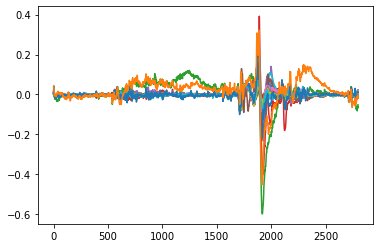

In [2]:
import numpy as np

train_set = pp.convert_dataset("../data/Training02/Training02A_EPOCFLEX_159242_2022.05.24T16.06.19+02.00.md.bp.csv")
train_set = train_set[0:2800]
plt.plot(train_set)
plt.show()

Above you can see the 32 different electrodes' signals.

In [3]:
IDLE = 0
FRONT = 1
BACK = 2
JUMP = 3

def labelize_set(train_set):
    result = list()
    for index, element in enumerate(train_set):
        if (index >= 0 and index < 378):
            result.append((element, FRONT))
        if (index >= 378 and index < 1146):
            result.append((element, IDLE))
        if (index >= 1146 and index < 1530):
            result.append((element, BACK))
        if (index >= 1530 and index < 2298):
            result.append((element, IDLE))
        if (index >= 2298 and index < 2682):
            result.append((element, JUMP))
        # if (index >= 2682 and index < 3834):
        #     result.append((element, IDLE))
        if (index >= 3834 and index < 4218):
            result.append((element, FRONT))
        # if (index >= 4218 and index < 4986):
        #     result.append((element, IDLE))
        if (index >= 4986 and index < 5369):
            result.append((element, BACK))
        # if (index >= 5369 and index < 6137):
        #     result.append((element, IDLE))
        if (index >= 6137 and index < 6521):
            result.append((element, JUMP))
        # if (index >= 6521 and index < 7673):
        #     result.append((element, IDLE))
    return result
    
labelled_set = labelize_set(train_set=train_set)


Applying labels to data was quite cumbersome since we didn't use the software's keystroke functionality.
I commented much of the **IDLE** phases because they were unnecessary.

100%|██████████| 500/500 [00:29<00:00, 17.16it/s]


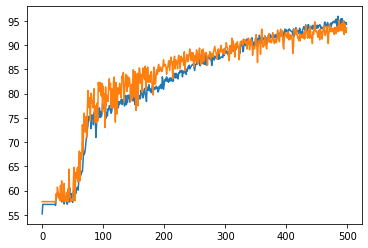

In [5]:
train_set, test_set = pp.split_data(labelled_set)

network = nn.LabelNetwork(label_count=4)
network, train_accuracies, test_accuracies = train_network(train_set=train_set, test_set=test_set, epoch=500, learning_rate=0.05, batch_size=64, network=network)

plt.plot(train_accuracies)
plt.plot(test_accuracies)

The accuracy increases from ~60 to 80 in 100 epochs and reaches as far as 95% in 500 epochs.
This result is pretty good but the network used was maybe not the most adapted...

In [6]:
train_accuracies[-1]

94.3123550415039

In [7]:
max(train_accuracies)

95.94405364990234